# Análise de Dados das Infrações de Transito no Distrito federal

### -  *Esta análise usa como bases dados abertos do ultimo semestre de 2018*
### - *Disponibilizadas no site -> http://www.dados.df.gov.br/dataset/infracoes-transito*

In [1]:
# importando as bibliotecas para analise de dados:

import numpy as np               # para computação matemática
import pandas as pd              # para manipulação de dados
import matplotlib.pyplot as plt  # para plotagens gráficas

# inicializando matplotlib no notebook 
%matplotlib inline 

### *Os dados importados a partir deste momento foram previamente alterados para ficar dentro do padrão unicode seguindo as recomendações do site da câmara dos deputados.*
### *Link para o tutorial -> https://dadosabertos.camara.leg.br/howtouse/2017-03-02-csv-corrigindo-acentuacao.html*

In [2]:
# importação dos Datasets:

df_julho = pd.read_csv('julho_2018.csv', sep=';', encoding='UTF-8', usecols=[0, 2, 3, 4, 5])
df_agosto = pd.read_csv('agosto_2018.csv', sep=';', encoding='UTF-8', usecols=[0, 2, 3, 4, 5])
df_outubro = pd.read_csv('outubro_2018.csv', sep=';', encoding='UTF-8', usecols=[0, 2, 3, 4, 5])
df_novembro = pd.read_csv('novembro_2018.csv', sep=';', encoding='UTF-8', usecols=[0, 2, 3, 4, 5])
df_dezembro = pd.read_csv('dezembro_2018.csv', sep=';', encoding='UTF-8', usecols=[0, 2, 3, 4, 5])

### *O DataSet referente ao mês de setembro disponibilizado pelo site de dados abertos do DF possui um erro no qual sua coluna referente as datas indicava o mês 08 e não 09, para correção deste probelma esse dataset foi previamente alterado mais uma vez no excel utilizando a função substituir.¶*

In [3]:
df_setembro = pd.read_csv('setembro_2018_corrigido.csv', sep=';', encoding='UTF-8', usecols=[0, 2, 3, 4, 5])

In [4]:
# padronizando o nome das colunas dos datasets para um futuro merge entre todos os arquivos:

df_julho.columns = ['codigo_infracao', 'tipo_infrator', 'tipo_veiculo', 'data_cometimento', 'hora_cometimento']
df_agosto.columns = ['codigo_infracao', 'tipo_infrator', 'tipo_veiculo', 'data_cometimento', 'hora_cometimento']
df_setembro.columns = ['codigo_infracao', 'tipo_infrator', 'tipo_veiculo', 'data_cometimento', 'hora_cometimento']
df_outubro.columns = ['codigo_infracao', 'tipo_infrator', 'tipo_veiculo', 'data_cometimento', 'hora_cometimento']
df_novembro.columns = ['codigo_infracao', 'tipo_infrator', 'tipo_veiculo', 'data_cometimento', 'hora_cometimento']
df_dezembro.columns = ['codigo_infracao', 'tipo_infrator', 'tipo_veiculo', 'data_cometimento', 'hora_cometimento']

In [5]:
# merge para criação do DataSet semestral:

df_semestral = pd.merge(df_julho, df_agosto, on=['codigo_infracao', 'tipo_infrator', 'tipo_veiculo', 'data_cometimento', 'hora_cometimento'], how='outer')
df_semestral = pd.merge(df_semestral, df_setembro, on=['codigo_infracao', 'tipo_infrator', 'tipo_veiculo', 'data_cometimento', 'hora_cometimento'], how='outer')
df_semestral = pd.merge(df_semestral, df_outubro, on=['codigo_infracao', 'tipo_infrator', 'tipo_veiculo', 'data_cometimento', 'hora_cometimento'], how='outer')
df_semestral = pd.merge(df_semestral, df_novembro, on=['codigo_infracao', 'tipo_infrator', 'tipo_veiculo', 'data_cometimento', 'hora_cometimento'], how='outer')
df_semestral = pd.merge(df_semestral, df_dezembro, on=['codigo_infracao', 'tipo_infrator', 'tipo_veiculo', 'data_cometimento', 'hora_cometimento'], how='outer')

In [6]:
# Visualização do DataSet semestral
df_semestral.head()

,codigo_infracao,tipo_infrator,tipo_veiculo,data_cometimento,hora_cometimento
0,7455-0,Condutor,AUTOMOVEL,01/07/2018,00:01
1,7455-0,Condutor,AUTOMOVEL,01/07/2018,00:02
2,6769-0,Proprietário,Automóvel,01/07/2018,00:02
3,7285-0,Condutor,Automóvel,01/07/2018,00:02
4,7579-0,Condutor,Automóvel,01/07/2018,00:03


# **Tratamento de Dados:**

In [7]:
# quantidade de linhas / colunas do dataset:
df_semestral.shape

(395758, 5)

#### *395758 linhas - infrações*
#### *5 colunas - atributos de cada infração*

## *Coluna ['codigo_infracao']*

In [8]:
# procurando valores despadronizados na coluna 'codigo_infracao':
df_semestral['codigo_infracao'].unique()

array(['7455-0', '6769-0', '7285-0', '7579-0', '7463-0', '6599-2',
       '7234-0', '5045-0', '7471-0', '6637-2', '5169-1', '6726-1',
       '5010-0', '6807-0', '6610-2', '5835-0', '5118-0', '6912-0',
       '5185-2', '5908-0', '6530-0', '5720-0', '5410-0', '5738-0',
       '5843-4', '5185-1', '7633-2', '5843-3', '5207-0', '7633-1',
       '5193-0', '5711-0', '5800-0', '5967-0', '7340-0', '6637-1',
       '6408-0', '7366-1', '5991-0', '7366-2', '5061-0', '7315-0',
       '6670-0', '6700-0', '6653-1', '6270-0', '5037-1', '5878-0',
       '6823-1', '5231-1', '7358-0', '6378-0', '5029-2', '5444-0',
       '6645-0', '5428-2', '5452-6', '5819-6', '6602-0', '6173-2',
       '6858-0', '5053-1', '6866-1', '5851-2', '7625-1', '5568-0',
       '5746-3', '5509-0', '6050-1', '5690-0', '7625-2', '6980-0',
       '5274-1', '5860-0', '5827-0', '5819-7', '5851-1', '5819-4',
       '5770-3', '6122-0', '5819-5', '5681-0', '5819-3', '5460-0',
       '6068-1', '5975-0', '5797-0', '7587-0', '5550-0', '5231

In [9]:
# função pra ajuste da coluna 'codigo_infracao'

def corrigir_codigo(valor):
    valor = valor.strip()
    return valor

# aplicando a função:
df_semestral['codigo_infracao'] = df_semestral['codigo_infracao'].apply(corrigir_codigo)

In [10]:
# Verificação:
df_semestral['codigo_infracao'].unique()

array(['7455-0', '6769-0', '7285-0', '7579-0', '7463-0', '6599-2',
       '7234-0', '5045-0', '7471-0', '6637-2', '5169-1', '6726-1',
       '5010-0', '6807-0', '6610-2', '5835-0', '5118-0', '6912-0',
       '5185-2', '5908-0', '6530-0', '5720-0', '5410-0', '5738-0',
       '5843-4', '5185-1', '7633-2', '5843-3', '5207-0', '7633-1',
       '5193-0', '5711-0', '5800-0', '5967-0', '7340-0', '6637-1',
       '6408-0', '7366-1', '5991-0', '7366-2', '5061-0', '7315-0',
       '6670-0', '6700-0', '6653-1', '6270-0', '5037-1', '5878-0',
       '6823-1', '5231-1', '7358-0', '6378-0', '5029-2', '5444-0',
       '6645-0', '5428-2', '5452-6', '5819-6', '6602-0', '6173-2',
       '6858-0', '5053-1', '6866-1', '5851-2', '7625-1', '5568-0',
       '5746-3', '5509-0', '6050-1', '5690-0', '7625-2', '6980-0',
       '5274-1', '5860-0', '5827-0', '5819-7', '5851-1', '5819-4',
       '5770-3', '6122-0', '5819-5', '5681-0', '5819-3', '5460-0',
       '6068-1', '5975-0', '5797-0', '7587-0', '5550-0', '5231

## *Coluna ['tipo_infrator']*

In [11]:
# procurando valores despadronizados na coluna 'tipo_infrator':

df_semestral['tipo_infrator'].unique()

array([' Condutor ', ' Proprietário ', ' Servidor Público ',
       ' Pessoa Jurídica', ' Pessoa Física', ' Condutor         ',
       ' Proprietário     ', ' Pessoa Jurídica  ', ' Pessoa Física    ',
       ' Condutor        ', ' Proprietário    ', ' Pessoa Jurídica ',
       ' Pessoa Física   ', 'Condutor', 'Proprietário'], dtype=object)

In [12]:
# função pra ajuste da coluna 'tipo_infrator'

def corrigir_infrator(valor):
    valor = valor.strip().lower().replace('á','a').replace('ú','u').replace('í','i').replace(' ','_')
    return valor

# aplicando a função:
df_semestral['tipo_infrator'] = df_semestral['tipo_infrator'].apply(corrigir_infrator)

In [13]:
df_semestral['tipo_infrator'].unique()

array(['condutor', 'proprietario', 'servidor_publico', 'pessoa_juridica',
       'pessoa_fisica'], dtype=object)

## *Coluna ['tipo_veiculo']*

In [14]:
# procurando valores despadronizados na coluna 'tipo_veiculo':

df_semestral['tipo_veiculo'].unique()

array([' AUTOMOVEL ', ' Automóvel ', ' CAMIONETA ', ' null',
       ' CAMINHONETE ', ' Camioneta ', ' CAMINHONET', ' MOTOCICLETA ',
       ' Motocicleta ', ' Utilitário', ' Caminhão Trator ', ' Motoneta',
       ' MOTOCICLET', ' MICROONIBUS ', ' CAMINHAO', ' UTILITARIO',
       ' ONIBUS', ' Caminhonete ', ' CAMINHAO TRATOR ', ' MICROONIBU',
       ' Microônibus ', ' Caminhão', ' Reboque ', ' MOTONETA', ' Ônibus',
       ' REBOQUE ', ' S.REBOQUE ', ' Ciclomotor', ' C. TRATOR ',
       ' Chassi Plataforma ', ' Semi-Reboque', ' Bonde ', ' Triciclo',
       ' -                      ', ' Camioneta                 ',
       ' Automóvel                 ', ' AUTOMOVEL                 ',
       ' MOTOCICLET                ', ' UTILITARIO                ',
       ' CAMINHONETE               ', ' Caminhonete               ',
       ' MOTOCICLETA               ', ' CAMIONETA                 ',
       ' CAMINHAO                  ', ' CAMINHONET                ',
       ' Motocicleta               '

In [15]:
# função pra ajuste da coluna 'tipo_veiculo', romação de acentuação e eliminação dos valores em maiusculo

def corrigir_veiculo(valor):
    valor = valor.strip().lower().replace('á','a').replace('ú','u').replace('í','i').replace('ó','o').replace('ô','o')
    valor = valor.replace('ã','a')
    return valor

# Transformando a coluna em string:
df_semestral['tipo_veiculo'] = df_semestral.tipo_veiculo.astype('str')

# aplicando a função:
df_semestral['tipo_veiculo'] = df_semestral['tipo_veiculo'].apply(corrigir_veiculo)

In [16]:
# verificação:

df_semestral['tipo_veiculo'].unique()

array(['automovel', 'camioneta', 'null', 'caminhonete', 'caminhonet',
       'motocicleta', 'utilitario', 'caminhao trator', 'motoneta',
       'motociclet', 'microonibus', 'caminhao', 'onibus', 'microonibu',
       'reboque', 's.reboque', 'ciclomotor', 'c. trator',
       'chassi plataforma', 'semi-reboque', 'bonde', 'triciclo', '-',
       'motor-casa', 'tr rodas', 'motor casa', 'nan', 'inexistente',
       'tr esteiras', 'bicicleta', 'tr misto', 'charrete'], dtype=object)

In [17]:
# função para alterar as palavras digitadas incorretamente na coluna 'tipo_veiculo' e alguns outros problemas:

def nome_veiculo(valor):
    valor = valor.replace('caminhonete','caminhonet').replace('caminhonet','caminhonete')
    valor = valor.replace('motocicleta','motociclet').replace('motociclet','motocicleta')
    valor = valor.replace('microonibus','microonibu').replace('microonibu','microonibus')
    valor = valor.replace('camioneta','Caminhoneta').replace('Caminhoneta','caminhoneta')
    valor = valor.replace('motor-casa','motor casa').replace('semi-reboque','semi reboque')
    valor = valor.replace('.',' ').replace('-','nan').replace(' ','_')
    valor = valor.replace('inexistente','nan').replace('null','nan')
    valor = valor.replace('nan','NaN')
    return valor

# aplicando a nova função:
df_semestral['tipo_veiculo'] = df_semestral['tipo_veiculo'].apply(nome_veiculo)

In [18]:
# verificação:

df_semestral['tipo_veiculo'].unique()

array(['automovel', 'caminhoneta', 'NaN', 'caminhonete', 'motocicleta',
       'utilitario', 'caminhao_trator', 'motoneta', 'microonibus',
       'caminhao', 'onibus', 'reboque', 's_reboque', 'ciclomotor',
       'c__trator', 'chassi_plataforma', 'semi_reboque', 'bonde',
       'triciclo', 'motor_casa', 'tr_rodas', 'tr_esteiras', 'bicicleta',
       'tr_misto', 'charrete'], dtype=object)

In [19]:
# fazendo a contagem de valores nulos:
df_semestral['tipo_veiculo'].value_counts()

automovel            279440
caminhonete           30934
caminhoneta           22876
motocicleta           22177
utilitario            13125
caminhao               8470
NaN                    5864
caminhao_trator        4725
microonibus            2308
s_reboque              1985
onibus                 1755
motoneta               1469
reboque                 438
semi_reboque             71
c__trator                46
ciclomotor               33
triciclo                 20
motor_casa               10
chassi_plataforma         4
bonde                     2
tr_rodas                  2
bicicleta                 1
tr_esteiras               1
tr_misto                  1
charrete                  1
Name: tipo_veiculo, dtype: int64

In [20]:
# variavel guardando os valores NaN com seus index
numeros = df_semestral[df_semestral['tipo_veiculo'] == 'NaN']

In [21]:
# Variavel guardando apenas os index de valores NaN
valores = numeros.index

In [22]:
# dropando valores com base nos index guardados
df_semestral.drop(valores, inplace=True)

In [23]:
# comprimento do novo df_semestral
df_semestral.shape

(389894, 5)

In [24]:
# verificação
df_semestral['tipo_veiculo'].value_counts()

automovel            279440
caminhonete           30934
caminhoneta           22876
motocicleta           22177
utilitario            13125
caminhao               8470
caminhao_trator        4725
microonibus            2308
s_reboque              1985
onibus                 1755
motoneta               1469
reboque                 438
semi_reboque             71
c__trator                46
ciclomotor               33
triciclo                 20
motor_casa               10
chassi_plataforma         4
bonde                     2
tr_rodas                  2
bicicleta                 1
tr_esteiras               1
tr_misto                  1
charrete                  1
Name: tipo_veiculo, dtype: int64

## *Coluna ['data_cometimento']*

In [25]:
# procurando valores despadronizados na coluna 'codigo_infracao':

df_semestral['data_cometimento'].unique()

array([' 01/07/2018 ', ' 02/07/2018 ', ' 03/07/2018 ', ' 04/07/2018 ',
       ' 05/07/2018 ', ' 06/07/2018 ', ' 07/07/2018 ', ' 08/07/2018 ',
       ' 09/07/2018 ', ' 10/07/2018 ', ' 11/07/2018 ', ' 12/07/2018 ',
       ' 13/07/2018 ', ' 14/07/2018 ', ' 15/07/2018 ', ' 16/07/2018 ',
       ' 17/07/2018 ', ' 18/07/2018 ', ' 19/07/2018 ', ' 20/07/2018 ',
       ' 21/07/2018 ', ' 22/07/2018 ', ' 23/07/2018 ', ' 24/07/2018 ',
       ' 25/07/2018 ', ' 26/07/2018 ', ' 27/07/2018 ', ' 28/07/2018 ',
       ' 29/07/2018 ', ' 30/07/2018 ', ' 31/07/2018 ', ' 01/08/2018     ',
       ' 02/08/2018     ', ' 03/08/2018     ', ' 04/08/2018     ',
       ' 05/08/2018     ', ' 06/08/2018     ', ' 07/08/2018     ',
       ' 08/08/2018     ', ' 09/08/2018     ', ' 10/08/2018     ',
       ' 11/08/2018     ', ' 12/08/2018     ', ' 13/08/2018     ',
       ' 14/08/2018     ', ' 15/08/2018     ', ' 16/08/2018     ',
       ' 17/08/2018     ', ' 18/08/2018     ', ' 19/08/2018     ',
       ' 20/08/2018     ',

In [26]:
# Transformando a coluna em string:

df_semestral['data_cometimento'] = df_semestral.data_cometimento.astype('str')

In [27]:
# Função para correção dos valores despadronizados nas datas
def corrigir_data(valor):
    valor = valor.strip()
    return valor

# aplicando a função:
df_semestral['data_cometimento'] = df_semestral['data_cometimento'].apply(corrigir_data)

In [28]:
# Visualização
df_semestral['data_cometimento'].unique()

array(['01/07/2018', '02/07/2018', '03/07/2018', '04/07/2018',
       '05/07/2018', '06/07/2018', '07/07/2018', '08/07/2018',
       '09/07/2018', '10/07/2018', '11/07/2018', '12/07/2018',
       '13/07/2018', '14/07/2018', '15/07/2018', '16/07/2018',
       '17/07/2018', '18/07/2018', '19/07/2018', '20/07/2018',
       '21/07/2018', '22/07/2018', '23/07/2018', '24/07/2018',
       '25/07/2018', '26/07/2018', '27/07/2018', '28/07/2018',
       '29/07/2018', '30/07/2018', '31/07/2018', '01/08/2018',
       '02/08/2018', '03/08/2018', '04/08/2018', '05/08/2018',
       '06/08/2018', '07/08/2018', '08/08/2018', '09/08/2018',
       '10/08/2018', '11/08/2018', '12/08/2018', '13/08/2018',
       '14/08/2018', '15/08/2018', '16/08/2018', '17/08/2018',
       '18/08/2018', '19/08/2018', '20/08/2018', '21/08/2018',
       '22/08/2018', '23/08/2018', '24/08/2018', '25/08/2018',
       '26/08/2018', '27/08/2018', '28/08/2018', '29/08/2018',
       '30/08/2018', '31/08/2018', '01/09/2018', '02/09

### *Erro encontrado:*
### *- setembro possui 30 dias mas no DataSet possui o dia  31!*

In [30]:
# removendo o dia inexistente do DataSet
df_semestral.drop(df_semestral[df_semestral['data_cometimento'] == '31/09/2018'].index, inplace=True)

In [31]:
# Novo comprimento do DataSet:
df_semestral.shape

(387026, 5)

## *Coluna ['hora_cometimento']*

In [32]:
# procurando valores despadronizados na coluna 'hora_cometimento':
df_semestral['hora_cometimento'].unique()

array([' 00:01   ', ' 00:02   ', ' 00:02  ', ..., '03:02', '03:35',
       '03:27'], dtype=object)

In [33]:
# função para corrigir os espaços desnecessarios nos valores da coluna
def corrigir_hora(valor):
    valor = valor.strip()
    return valor

# aplicando a função:
df_semestral['hora_cometimento'] = df_semestral['hora_cometimento'].apply(corrigir_hora)

In [34]:
# Verificação:
df_semestral['hora_cometimento'].unique()

array(['00:01', '00:02', '00:03', ..., '02:52', '05:36', '03:55'],
      dtype=object)

# **Visualização de Dados:**

### *Qual o dia em que mais Infrações foram registradas?*

In [35]:
df_semestral['data_cometimento'].value_counts().head(1)

14/12/2018    4476
Name: data_cometimento, dtype: int64

### *Qual o horario(em segundos) em que mais infrações foram registradas?¶*

In [36]:
df_semestral['hora_cometimento'].value_counts().head(1)

16:20    571
Name: hora_cometimento, dtype: int64

### *Qual a Infração mais comum?*

In [37]:
df_semestral['codigo_infracao'].value_counts().head()

7455-0    187258
5681-0     32683
7463-0     21350
6769-0     20157
5690-0     14137
Name: codigo_infracao, dtype: int64

#### *- 7455-0 (Transitar em velocidade superior à máxima permitida em até 20%)*
#### *- 5681-0 (Transitar na faixa/pista da direita regul circulação exclusiva determ veículo)*
#### *- 7463-0 (Transitar em velocidade superior à máxima permitida em mais de 20% até 50%)*
#### *- 6769-0 (Conduzir veíc c/ defeito no sist de iluminação, sinaliz ou lâmpadas queimadas)*
#### *- 5690-0 (Transitar na faixa/pista da esquerda regul circulação exclusiva determ veículo)*

### *Quais são os tipos de veiculos que mais cometem infrações?¶*

In [39]:
df_semestral['tipo_veiculo'].value_counts().head()

automovel      277467
caminhonete     30705
caminhoneta     22696
motocicleta     21964
utilitario      13041
Name: tipo_veiculo, dtype: int64

### *Quais os tipos de condutores que mais cometem Infrações?¶*

In [40]:
df_semestral['tipo_infrator'].value_counts().head()

condutor            356623
proprietario         30381
servidor_publico        12
pessoa_juridica          5
pessoa_fisica            5
Name: tipo_infrator, dtype: int64

### *Qual a relação entre os meses e a quantidade de Infrações Registradas?*

In [42]:
# Criação de uma nova coluna com os dias em que ocorreram as Infrações
def lista_dias(valor):
    lista = []
    for data in valor:
        lista.append(data[0:2])
    return lista

# aplicando a função ao DataSet:
df_semestral['dia_cometimento'] = lista_dias(df_semestral['data_cometimento'])

In [43]:
# Criação de uma nova coluna com os meses em que ocorreram as Infrações
def lista_meses(valor):
    lista = []
    for data in valor:
        lista.append(data[3:5])
    return lista

# aplicando a função ao DataSet:
df_semestral['mes_cometimento'] = lista_meses(df_semestral['data_cometimento'])

In [44]:
# Visualização:
df_semestral.head()

,codigo_infracao,tipo_infrator,tipo_veiculo,data_cometimento,hora_cometimento,dia_cometimento,mes_cometimento
0,7455-0,condutor,automovel,01/07/2018,00:01,01,07
1,7455-0,condutor,automovel,01/07/2018,00:02,01,07
2,6769-0,proprietario,automovel,01/07/2018,00:02,01,07
3,7285-0,condutor,automovel,01/07/2018,00:02,01,07
4,7579-0,condutor,automovel,01/07/2018,00:03,01,07


In [45]:
# Variavel com os meses
qtd_mes = df_semestral['mes_cometimento'].value_counts().sort_index()

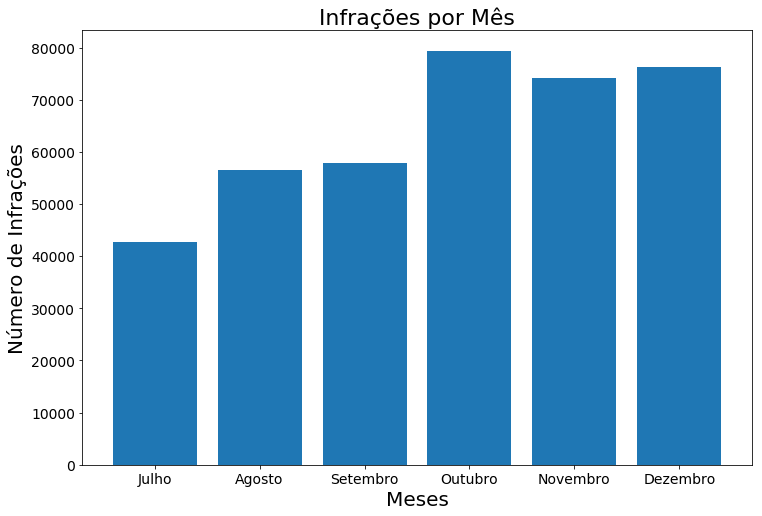

In [47]:
# plot de Infrações x meses
plt.figure(figsize=(12, 8))
plt.bar(qtd_mes.index, qtd_mes.values)
labels = ['Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']

plt.xlabel('Meses', fontsize=20)
plt.xticks(qtd_mes.index, labels, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Número de Infrações', fontsize=20)

plt.title('Infrações por Mês', fontsize=22)

plt.show()

### *Qual a relação entre o dia do mês e a quantidade de Infrações?¶*

In [48]:
# variavel com os dias
qtd_dia = df_semestral['dia_cometimento'].value_counts().sort_index()

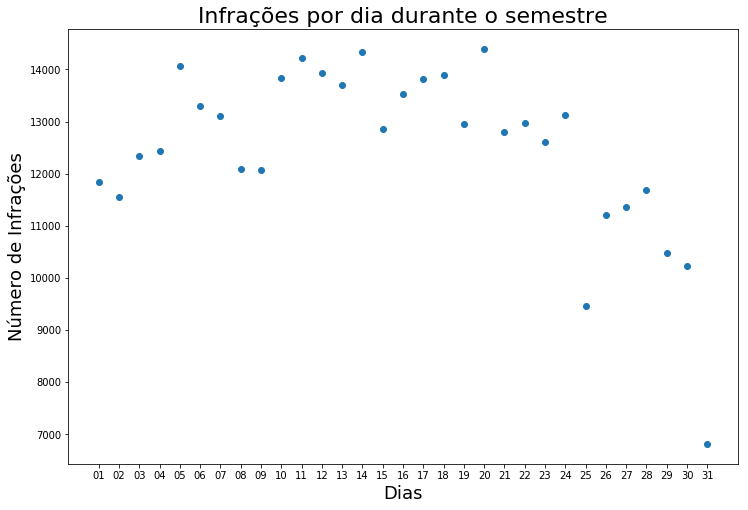

In [49]:
# plot de Infrações x dias durante o semestre
plt.figure(figsize=(12, 8))
plt.scatter(qtd_dia.index, qtd_dia.values)
plt.xlabel('Dias', fontsize=18)
plt.ylabel('Número de Infrações', fontsize=18)
plt.title('Infrações por dia durante o semestre', fontsize=22)

plt.show()

### *Qual a relação entre o tipo de veiculo s a quantidade de Infrações?*

In [50]:
# Variavel com os tipos de veiculos
qtd_vei = df_semestral['tipo_veiculo'].value_counts().sort_index()

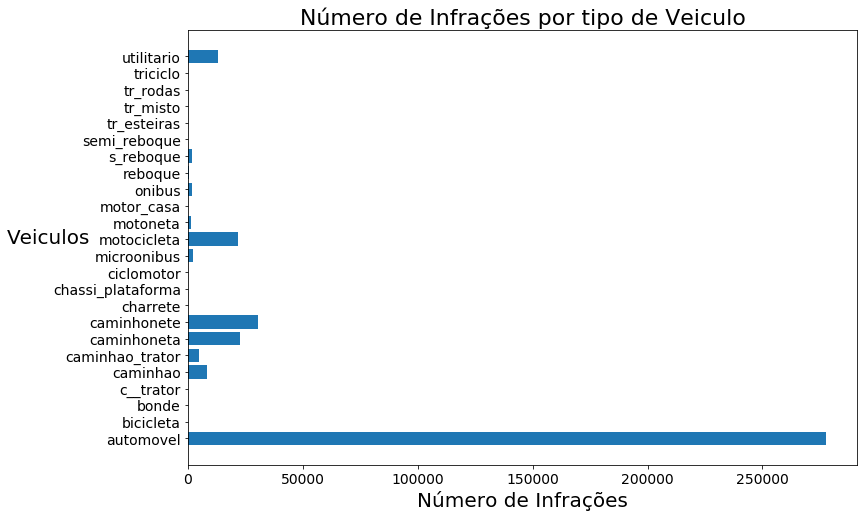

In [51]:
# plot Número de Infrações por tipo de Veiculo
plt.figure(figsize=(12, 8))
plt.barh(qtd_vei.index, qtd_vei.values)

plt.xlabel('Número de Infrações', fontsize=20)
plt.ylabel('Veiculos', fontsize=20, rotation='horizontal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('Número de Infrações por tipo de Veiculo', fontsize=22)

plt.show()

### *Qual a relação entre o tipo de Infrator e a quantidade de Infrações?¶*

In [52]:
# variavel com o tipo de condutor
qtd_cond = df_semestral['tipo_infrator'].value_counts().sort_index()

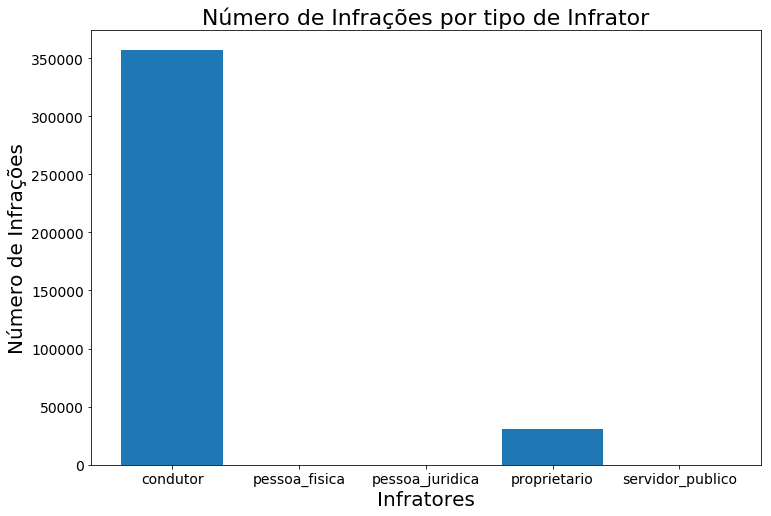

In [53]:
# plot Número de Infrações por tipo de Infrator
plt.figure(figsize=(12, 8))
plt.bar(qtd_cond.index, qtd_cond.values)

plt.xlabel('Infratores', fontsize=20)
plt.ylabel('Número de Infrações', fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('Número de Infrações por tipo de Infrator', fontsize=22)

plt.show()

In [54]:
# Utilização do "len()" para saber quantos valores unicos existem na variavel 'codigo_infracao' 
len(df_semestral['codigo_infracao'].unique())

234

In [55]:
# Visualização:
df_semestral['codigo_infracao'].unique()

array(['7455-0', '6769-0', '7285-0', '7579-0', '7463-0', '6599-2',
       '7234-0', '5045-0', '7471-0', '6637-2', '5169-1', '6726-1',
       '5010-0', '6807-0', '6610-2', '5835-0', '5118-0', '6912-0',
       '5185-2', '5908-0', '6530-0', '5720-0', '5410-0', '5738-0',
       '5843-4', '5185-1', '7633-2', '5843-3', '5207-0', '7633-1',
       '5193-0', '5711-0', '5800-0', '5967-0', '7340-0', '6637-1',
       '6408-0', '7366-1', '5991-0', '7366-2', '5061-0', '7315-0',
       '6670-0', '6700-0', '6653-1', '6270-0', '5037-1', '5878-0',
       '6823-1', '5231-1', '7358-0', '6378-0', '5444-0', '6645-0',
       '5428-2', '5452-6', '5819-6', '6602-0', '6173-2', '6858-0',
       '5053-1', '6866-1', '5851-2', '7625-1', '5568-0', '5746-3',
       '5509-0', '6050-1', '5690-0', '7625-2', '6980-0', '5274-1',
       '5860-0', '5827-0', '5819-7', '5851-1', '5819-4', '5770-3',
       '6122-0', '5819-5', '5681-0', '5819-3', '6068-1', '5975-0',
       '5797-0', '7587-0', '5550-0', '5231-2', '5274-2', '6041

### *Qual a relação entre a gravidade da Infração e a quantidade de Infrações ocorridas?*

#### ***- As funções desenvolvidas nas proximas celulas utilizarão como base Informações da tabela disponibilizada no site do DETRAN:***
#### ***- LINK:https://detran.to.gov.br/infracao/tabela-de-infracoes/***  

In [58]:
def coluna_gravidade(valor):
    
    # Váriaveis de gravidade:
    
    sem_g = ('7480-1','7498-0','7510-2','7528-1') # 4
    
    leve = ('5207-0', '5444-0', '5606-0', '5622-1', '5622-2', '5622-3', '5622-4', '5622-5', '5681-0', '6440-0', '6483-0', '6491-0', '6912-0') # 13 
    
    media = ('5223-1', '5223-2', '5231-1', '5231-2', '5347-0', '5371-0', '5410-0', '5460-0', '5550-0', '5630-0', '5665-0', '5703-0', '5711-0', 
             '5746-2', '5746-3', '5762-0', '5851-1', '5851-2', '5878-0', '5894-0', '6190-0', '6548-0', '6750-0', '6769-0', '6858-0', '6866-1', 
             '6866-2', '6955-0', '7099-2', '7226-1', '7242-1', '7242-2', '7277-0', '7285-0', '7293-0', '7315-0', '7323-3', '7331-0', '7340-0', # 51
             '7358-0', '7366-1', '7366-2', '5479-0', '5509-0', '5525-0', '5746-1', '5860-0', '6408-0', '7234-0', '7323-2', '7455-0')
    
    grave = ('5185-1', '5355-0', '5452-1', '5452-2', '5452-3', '5452-4', '5452-6', '5452-7', '5487-0', '5541-2', '5568-0', '5614-1', '5614-3', # 72 
             '5690-0', '5720-0', '5800-0', '5827-0', '5835-0', '5843-1', '5843-2', '5843-3', '5975-0', '6041-1', '6041-2', '6068-1', '6068-2', 
             '6084-1', '6084-3', '6157-0', '6173-1', '6173-2', '6181-0', '6270-0', '6327-0', '6378-0', '6459-1', '6467-0', '6530-0', '6610-1', 
             '6610-2', '6637-1', '6637-2', '6645-0', '6653-1', '6653-2', '6688-0', '6696-1', '6700-0', '6718-0', '6726-1', '6742-0', '6920-1', 
             '6947-1', '7099-1', '7218-0', '7463-0', '7552-2', '5185-2', '5339-0', '5452-5', '5541-1', '5614-2', '5843-4', '6084-4', '6173-3',
             '6432-1', '6432-2', '6459-2', '6661-0', '6670-0', '6823-1', '6963-0')
             
    graviss = ( '5045-0', '5053-4', '5096-0', '5142-0', '5177-0', '5428-1', '5428-3', '5428-4', '5738-0', '5770-1', '5770-3', '5886-0', '5991-0'
              , '6009-2', '6017-1', '6017-2', '6017-3', '6017-4', '6017-5', '6025-0', '6033-0', '6050-1', '6050-2', '6050-3', '6130-0', '6149-0'
              , '6394-3', '6394-4', '6556-2', '6564-0', '6580-0', '6599-2', '6602-0', '6785-1', '6785-2', '6807-0', '6971-0', '6980-0', '7587-0' # 77
              , '5053-1', '5193-0', '5428-2', '5770-2', '5770-4', '6122-0', '6556-1', '6556-4', '6599-1', '6793-0', '7625-1', '7625-2', '7633-1'
              , '7633-2', '5029-1', '5029-2', '5037-1', '5037-2', '5061-0', '5088-1', '5118-0', '5126-1', '5126-2', '5134-1', '5134-2', '5258-3'
              , '5819-1', '5819-2', '5819-3', '5819-4', '5819-5', '5819-6', '5819-7', '5908-0', '5940-1', '5959-4', '5967-0', '5010-0')
             
    auto_s = ('7471-0', '5215-2', '6076-0', '7048-1', '7056-1', '7064-0', '5215-1', '5282-0', '5290-0', '5320-0', '5169-1', '5169-2', '5274-1',  # 17
              '5274-2', '7579-0', '5797-0', '5312-0') 
                     
    # sta que receberá os valores
    lista = []
    
             
    # código 
    for codigo in valor:
             
             if codigo in sem_g:
                 lista.append('sem_gravidade')
             
             elif codigo in leve:
                 lista.append('leve')
             
             elif codigo in media:
                 lista.append('media')
             
             elif codigo in grave:
                 lista.append('grave')
             
             elif codigo in graviss:
                 lista.append('gravissima')
             
             elif codigo in auto_s:
                 lista.append('auto_suspensiva')
              
    return lista 

In [61]:
# Aplicando a função que define a gravidade da infração com base em sua númeração no código de transito:
df_semestral['gravidade'] = coluna_gravidade(df_semestral['codigo_infracao'])

In [62]:
# Verificação e visualização dos dados da nova coluna
df_semestral['gravidade'].unique()

array(['media', 'auto_suspensiva', 'grave', 'gravissima', 'leve',
       'sem_gravidade'], dtype=object)

In [63]:
# Contagem dos valores por gravidade da infração
df_semestral['gravidade'].value_counts()

media              226755
grave               67041
gravissima          46101
leve                38277
auto_suspensiva      8834
sem_gravidade          18
Name: gravidade, dtype: int64

In [64]:
# Variavel contendo a quantidade de infrações por gravidade
qtd_grav = df_semestral['gravidade'].value_counts().sort_values()

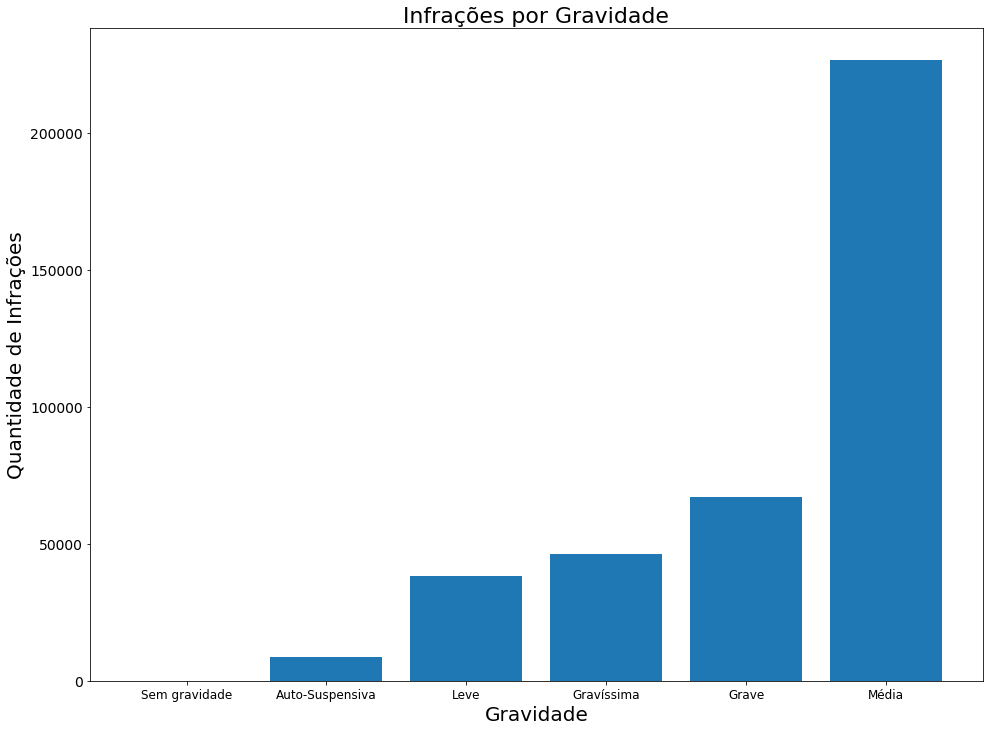

In [65]:
# plotagem das informações anteriores em grafico
plt.figure(figsize=(16, 12))
plt.bar(qtd_grav.index, qtd_grav.values)
labels = ['Sem gravidade', 'Auto-Suspensiva', 'Leve', 'Gravíssima', 'Grave', 'Média']

plt.xlabel('Gravidade', fontsize=20)
plt.xticks(qtd_grav.index, labels , fontsize=12)

plt.yticks(fontsize=14)
plt.ylabel('Quantidade de Infrações', fontsize=20)

plt.title('Infrações por Gravidade', fontsize=22)

plt.show()

### *Qual a arrecadação total em Multas no ultimo semestre de 2018?*

In [66]:
def coluna_arrecadacao(coluna):
    
    # valor da multa: 0
    sem_multa = ('7480-1','7498-0','7510-2','7528-1') # 4
    
    # valor da multa: 88.38
    a = ('5207-0', '5444-0', '5606-0', '5622-1', '5622-2', '5622-3', '5622-4', '5622-5', '5681-0', '6440-0', '6483-0', '6491-0', '6912-0') # 13 
    
    # valor da multa: 130.16
    b = ('5223-1', '5223-2', '5231-1', '5231-2', '5347-0', '5371-0', '5410-0', '5460-0', '5550-0', '5630-0', '5665-0', '5703-0', '5711-0', 
         '5746-2', '5746-3', '5762-0', '5851-1', '5851-2', '5878-0', '5894-0', '6190-0', '6548-0', '6750-0', '6769-0', '6858-0', '6866-1', 
         '6866-2', '6955-0', '7099-2', '7226-1', '7242-1', '7242-2', '7277-0', '7285-0', '7293-0', '7315-0', '7323-3', '7331-0', '7340-0', # 51
         '7358-0', '7366-1', '7366-2', '5479-0', '5509-0', '5525-0', '5746-1', '5860-0', '6408-0', '7234-0', '7323-2', '7455-0')
    
    # valor da multa: 195.23
    c = ('5185-1', '5355-0', '5452-1', '5452-2', '5452-3', '5452-4', '5452-6', '5452-7', '5487-0', '5541-2', '5568-0', '5614-1', '5614-3', # 72 
         '5690-0', '5720-0', '5800-0', '5827-0', '5835-0', '5843-1', '5843-2', '5843-3', '5975-0', '6041-1', '6041-2', '6068-1', '6068-2', 
         '6084-1', '6084-3', '6157-0', '6173-1', '6173-2', '6181-0', '6270-0', '6327-0', '6378-0', '6459-1', '6467-0', '6530-0', '6610-1', 
         '6610-2', '6637-1', '6637-2', '6645-0', '6653-1', '6653-2', '6688-0', '6696-1', '6700-0', '6718-0', '6726-1', '6742-0', '6920-1', 
         '6947-1', '7099-1', '7218-0', '7463-0', '7552-2', '5185-2', '5339-0', '5452-5', '5541-1', '5614-2', '5843-4', '6084-4', '6173-3',
         '6432-1', '6432-2', '6459-2', '6661-0', '6670-0', '6823-1', '6963-0')
    
    # valor da multa: 880.41         
    d = ('5010-0', '5037-1', '5037-2', '5061-0', '5088-1', '5118-0', '5134-1', '5134-2', '5819-1', '5819-2', '5819-3', '5819-4', '5819-5', # 15
               '5819-6', '5819-7', '7471-0')
    
    # valor da multa: 1467.35
    e = ('5029-1', '5029-2', '5126-1', '5126-2', '5908-0', '5924-1', '5940-1', '5959-4', '5967-0', '5282-0', '5290-0', '5312-0', '5320-0')
               
            
    # valor da multa:  293.47
    f = ( '5045-0', '5053-4', '5096-0', '5142-0', '5177-0', '5428-1', '5428-3', '5428-4', '5738-0', '5770-1', '5770-3', '5886-0', '5991-0'
        , '6009-2', '6017-1', '6017-2', '6017-3', '6017-4', '6017-5', '6025-0', '6033-0', '6050-1', '6050-2', '6050-3', '6130-0', '6149-0'
        , '6394-3', '6394-4', '6556-2', '6564-0', '6580-0', '6599-2', '6602-0', '6785-1', '6785-2', '6807-0', '6971-0', '6980-0', '7587-0' # 61
        , '5053-1', '5193-0', '5428-2', '5770-2', '5770-4', '6122-0', '6556-1', '6556-4', '6599-1', '6793-0', '7625-1', '7625-2', '7633-1'
        , '7633-2', '5215-2', '6076-0', '7048-1', '7056-1', '5215-1')
               
    # valor da multa:  2934.70
    g = ('5258-3', '5169-1', '5169-2', '5274-1','5274-2', '5797-0', '7579-0', '7064-0')
    
    # lista para as variaveis:
    lista = []
               
   # código 
    for codigo in coluna:
             
             if codigo in sem_multa:
                 lista.append(0)
             
             elif codigo in a:
                 lista.append(88.38)
             
             elif codigo in b:
                 lista.append(130.16)
             
             elif codigo in c:
                 lista.append(195.23)
             
             elif codigo in d:
                 lista.append(880.41)
             
             elif codigo in e:
                 lista.append(1467.35)
               
             elif codigo in f:
                 lista.append(293.47)
               
             elif codigo in g:
                 lista.append(2934.70)
              
    return lista             

In [69]:
# aplicando a função que define a multa da infração com base em sua númeração no código de transito
df_semestral['arrecadacao'] = coluna_arrecadacao(df_semestral['codigo_infracao'])

In [70]:
# Visualização do DataSet:
df_semestral.head()

,codigo_infracao,tipo_infrator,tipo_veiculo,data_cometimento,hora_cometimento,dia_cometimento,mes_cometimento,gravidade,arrecadacao
0,7455-0,condutor,automovel,01/07/2018,00:01,01,07,media,130.16
1,7455-0,condutor,automovel,01/07/2018,00:02,01,07,media,130.16
2,6769-0,proprietario,automovel,01/07/2018,00:02,01,07,media,130.16
3,7285-0,condutor,automovel,01/07/2018,00:02,01,07,media,130.16
4,7579-0,condutor,automovel,01/07/2018,00:03,01,07,auto_suspensiva,2934.70


### *Qual foi a arrecadação total do DETRAN em multas no ultimo semestre de 2018?*

In [71]:
df_semestral['arrecadacao'].sum()

84164746.14

### *Infrações por dia durante o semestre*

In [72]:
# Agrupando os valores das multas por mes e depois por dia de cometimento e somando  para saber o total de arrecadações por dia 
# utilizando as colunas criadas anteriormente
df_semestral.groupby(['mes_cometimento', 'dia_cometimento'])['arrecadacao'].sum()

mes_cometimento  dia_cometimento
07               01                  551807.41
                 02                  339883.44
                 03                  333576.41
                 04                  256878.38
                 05                  387668.37
                 06                  467377.00
                 07                  345297.65
                 08                  537358.91
                 09                  280759.06
                 10                  222086.74
                 11                  326152.97
                 12                  320030.32
                 13                  500498.17
                 14                  450308.11
                 15                  508401.62
                 16                  286563.48
                 17                  293625.06
                 18                  259544.68
                 19                  258320.98
                 20                  358601.71
                 21        

In [73]:
# utilizando a função "len()" para saber o comprimento do resultado e criar uma variavel compativel em grafico
len(df_semestral.groupby(['mes_cometimento', 'dia_cometimento'])['arrecadacao'].sum())

184

In [75]:
# varivel com este "len()"
valores = df_semestral.groupby(['mes_cometimento', 'dia_cometimento'])['arrecadacao'].sum()
dinheiro = valores.values

In [76]:
# Variavel compativel
lista_dias = np.arange(1, 185, 1)

In [77]:
# Visualização:
dinheiro

array([ 551807.40999999,  339883.44      ,  333576.41      ,
        256878.38      ,  387668.37      ,  467376.99999999,
        345297.65      ,  537358.90999999,  280759.06      ,
        222086.74      ,  326152.97      ,  320030.32      ,
        500498.16999999,  450308.10999999,  508401.61999999,
        286563.48      ,  293625.06      ,  259544.68000001,
        258320.98      ,  358601.70999999,  470941.19999998,
        466266.86999999,  295806.19      ,  243013.02      ,
        279835.97      ,  311911.36      ,  501468.32999999,
        384928.87999999,  423778.49      ,  233314.47      ,
        292056.65      ,  253718.79      ,  329996.9       ,
        572938.21999998,  419752.09999999,  477814.99999999,
        364287.65999999,  243551.42      ,  344319.31999999,
        238412.54      ,  580182.63999998,  520099.33999998,
        421457.88999999,  291934.9       ,  309802.89      ,
        186965.33      ,  333791.94      ,  511556.54999999,
        475365.15999998,

In [78]:
lista_dias

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

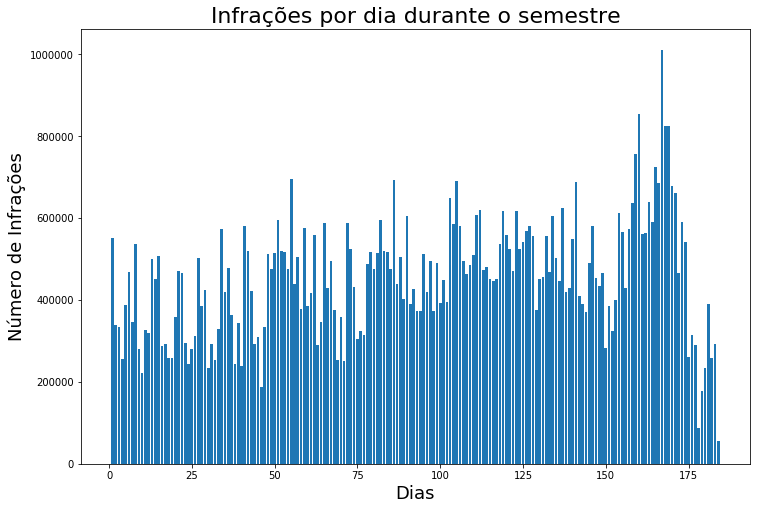

In [79]:
# plot em barras dos dias do semestre (lista_dias) x valores arrecadados por dia(dinheiro)
plt.figure(figsize=(12, 8))
plt.bar(lista_dias, dinheiro)
plt.xlabel('Dias', fontsize=18)
plt.ylabel('Número de Infrações', fontsize=18)
plt.title('Infrações por dia durante o semestre', fontsize=22)

plt.show()

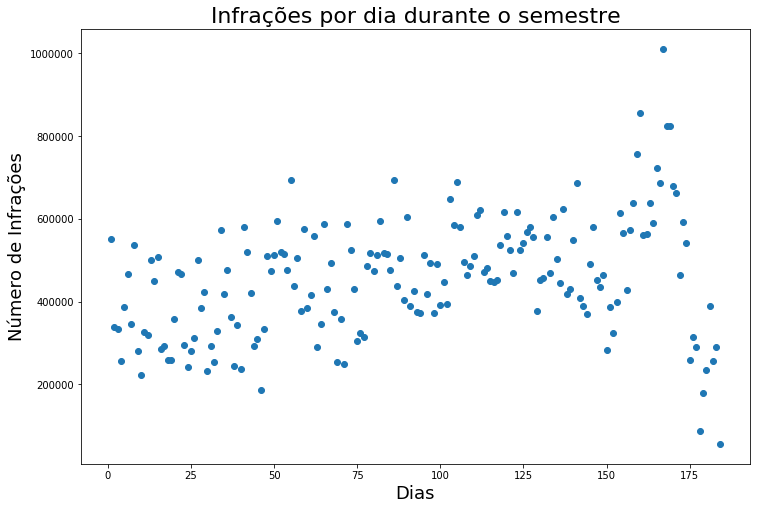

In [80]:
# plot de dispersão dos dias do semestre (lista_dias) x valores arrecadados por dia(dinheiro)
plt.figure(figsize=(12, 8))
plt.scatter(lista_dias, dinheiro)
plt.xlabel('Dias', fontsize=18)
plt.ylabel('Número de Infrações', fontsize=18)
plt.title('Infrações por dia durante o semestre', fontsize=22)

plt.show()

# ***Regressão Linear:***

In [81]:
# Importando a biblioteca para regressão linear
from sklearn.linear_model import LinearRegression

# Importando função para divisão sem viés dos dados em treino e teste
from sklearn.model_selection import train_test_split

In [82]:
# Instanciando a classe linear regression
modelo = LinearRegression()

In [83]:
# Verificando o tipo da variavel
type(modelo)

sklearn.linear_model.base.LinearRegression

# Equação referente ao modelo de Regressão Linear:
# $$ {\displaystyle y_{i}=\alpha +\beta \,X_{i}+\varepsilon _{i}} $$

## $ y_{i} $  
#### Variável explicada (dependente); representa o que o modelo tentará prever 

## $ {\displaystyle \alpha } $ 
#### alpha: É uma constante, que representa a interceptação da reta com o eixo vertical;

## $ {\displaystyle \beta } $ 
#### beta: Representa a inclinação (coeficiente angular) em relação à variável explicativa; 

## $ {\displaystyle X_{i}} X_{i} $
#### Variável explicativa (independente); 

# ***Notação utilizada para este projeto:***
## ***Y - Variável dependente (Arrecadação em multas por dia)***
## ***X - Variável Independente (dias do semestre)***

In [91]:
# o algoritmo necessita que o valor seja informado no formato lista de listas por isso:
# Transformando a variavel dos dias em uma variavel no formato que o algoritmo necessita
lista_dias = np.array(lista_dias).reshape(-1, 1)

In [92]:
# Instanciando as variaveis de maneira que os dados sem divididos sem interferencia humana
X_treino, X_teste, Y_treino, Y_teste = train_test_split(lista_dias, dinheiro, test_size= 0.30, random_state = 5)

In [93]:
# Verificando os tamanhos:
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(128, 1) (56, 1) (128,) (56,)


In [94]:
modelo.fit(X_treino, Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
# estabelecendo as previsões de treino(para visualização) e teste
prev_treino = modelo.predict(X_treino)
prev_teste = modelo.predict(X_teste)

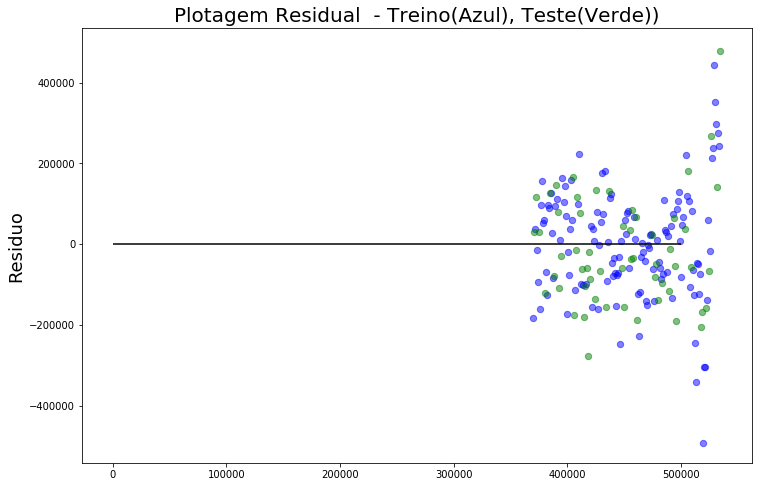

In [98]:
# Plot residual para comparação entre as variaveis treino e teste
plt.figure(figsize=(12, 8))
plt.scatter(modelo.predict(X_treino), modelo.predict(X_treino) - Y_treino, c='b', s = 40, alpha = 0.5)
plt.scatter(modelo.predict(X_teste), modelo.predict(X_teste) - Y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines( y = 0, xmin = 0, xmax = 500000)
plt.ylabel('Residuo', fontsize=18)
plt.title("Plotagem Residual  - Treino(Azul), Teste(Verde))",fontsize=20)
plt.show()

### *Visualização do Modelo de Regressão Linear dentro do escatterplot anterior:*

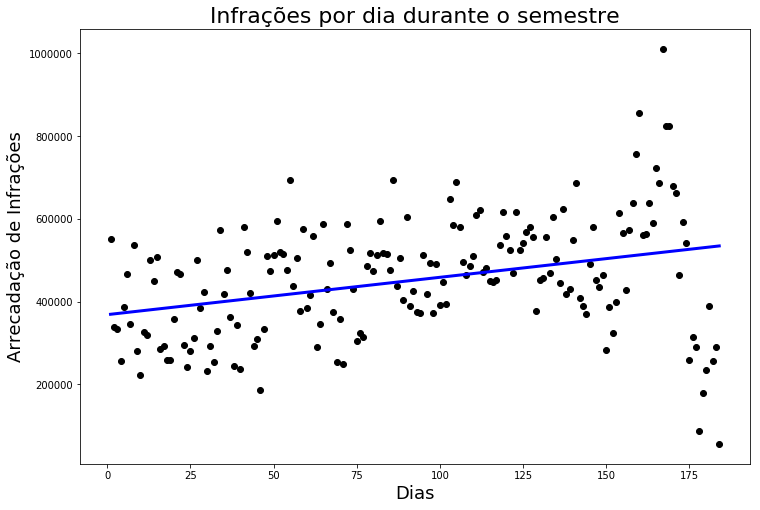

In [99]:
plt.figure(figsize=(12, 8))
plt.scatter(lista_dias, dinheiro, color = 'black')
plt.plot(lista_dias, modelo.predict(lista_dias), color = 'blue', linewidth = 3)
plt.xlabel('Dias', fontsize=18)
plt.ylabel('Arrecadação de Infrações', fontsize=18)
plt.title('Infrações por dia durante o semestre', fontsize=22)

plt.show()

In [100]:
# Teste final para o modelo de regressão linear:
modelo.predict(190)

array([540257.31990858])

### ***540257 reais e 31 centavos serão arrecadados no dia 190 (6 de janeiro de 2019) segundo o modelo construido***

In [101]:
# Visualização do DataSet final:
df_semestral.head(10)

,codigo_infracao,tipo_infrator,tipo_veiculo,data_cometimento,hora_cometimento,dia_cometimento,mes_cometimento,gravidade,arrecadacao
0,7455-0,condutor,automovel,01/07/2018,00:01,01,07,media,130.16
1,7455-0,condutor,automovel,01/07/2018,00:02,01,07,media,130.16
2,6769-0,proprietario,automovel,01/07/2018,00:02,01,07,media,130.16
3,7285-0,condutor,automovel,01/07/2018,00:02,01,07,media,130.16
4,7579-0,condutor,automovel,01/07/2018,00:03,01,07,auto_suspensiva,2934.70
5,7455-0,condutor,caminhoneta,01/07/2018,00:06,01,07,media,130.16
7,7463-0,condutor,automovel,01/07/2018,00:09,01,07,grave,195.23
8,7455-0,condutor,automovel,01/07/2018,00:09,01,07,media,130.16
9,7285-0,condutor,automovel,01/07/2018,00:09,01,07,media,130.16
10,7463-0,condutor,automovel,01/07/2018,00:10,01,07,grave,195.23


In [102]:
# salvando o novo dataframe em um CSV:
df_semestral.to_csv('df_semestral.csv')